#Image Classification using Deep Learning models.

In this project we would be using CIFAR-10 dataset to classify images into one of ten predefined categories
('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') using Deep Learning models.


Image classification forms the basis of many visual recognition systems, enabling computers to understand and interpret the content of images. It allows machines to identify objects, scenes, and patterns within images, facilitating tasks such as content-based image retrieval and recommendation systems. It helps detect and recognize objects, people, and activities of interest from surveillance footage, aiding in tasks such as intruder detection, crowd monitoring, and traffic analysis.
In the field of medicine, image classification helps identify various diseases and abnormalities from medical images such as X-rays, MRIs, and CT scans.
Image classification is very useful in the field of autonomous driving. It helps autonomous vehicles navigate safely by identifying pedestrians, vehicles, traffic signs, and other relevant objects on the road.

We will import the CIFAR-10 dataset directly from TensorFlow's Keras module.
CIFAR-10 dataset is primarily designed for image classification tasks.
CIFAR-10 stands for the "Canadian Institute for Advanced Research" and contains 60,000 32x32 color images in 10 different classes, with 6,000 images per class.
The dataset is split into 50,000 training images and 10,000 testing images.
Each image is labeled with one of the following classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.
The classes are:

Label	Description:
*   0	airplane
*   1	automobile
*   2	bird
*   3	cat
*   4	deer
*   5	dog
*   6	frog
*   7	horse
*   8	ship
*   9	truck

We would be using Deep learning models like simple CNN model, ResNet and DenseNet models to classify the images and to see how accurately these models classify the images.


In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models,layers
from tensorflow.keras import utils, regularizers
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.initializers import he_normal
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.image import resize
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping

We will install visual keras so that we can visualize the models that we build.

In [2]:
# Installing Visual Keras
!pip install visualkeras
import visualkeras

First, we will load the CIFAR-10 dataset directly from TensorFlow's Keras module.

In [8]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
# Print the shape of the training and test datasets
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)
print("=======================================")

# Get unique values in y_train and y_test
unique_values_train = np.unique(y_train)
unique_values_test = np.unique(y_test)
print("Unique values in y_train:", unique_values_train)
print("Unique values in y_test:", unique_values_test)
print("=======================================")

n_samples = X_train.shape[0]
n_features = X_train.shape[1:]
n_classes = len(unique_values_train)
print(f'Characteristics of train data:\nNumber of Samples: {n_samples}\nNumber of Features: {n_features}\nNumber of Classes: {n_classes}')


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]
Characteristics of train data:
Number of Samples: 50000
Number of Features: (32, 32, 3)
Number of Classes: 10


Let us see the classes with their corresponding label names.

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Print the corresponding class names for y_train
print("Class names for y_train:")
for label in np.unique(y_train):
    print(label, "-", class_names[label])

Class names for y_train:
0 - airplane
1 - automobile
2 - bird
3 - cat
4 - deer
5 - dog
6 - frog
7 - horse
8 - ship
9 - truck


Let us plot histograms to see the number of images in each category in training data and test data.

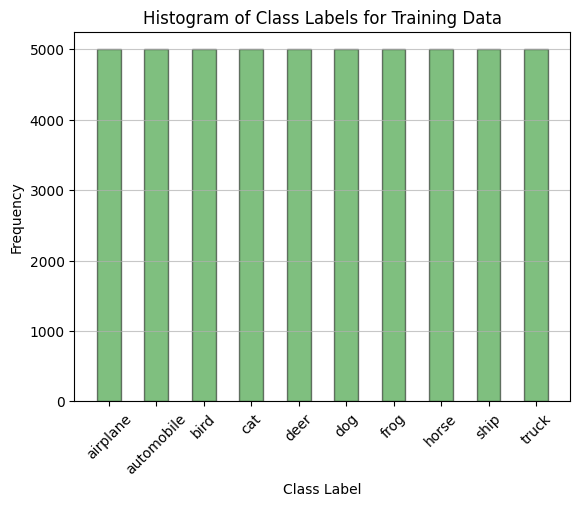

In [6]:
plt.hist(y_train,bins=np.arange(11)-0.5, edgecolor='black',color='green',rwidth=0.5,alpha=0.5)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Histogram of Class Labels for Training Data')
plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()

From the plot above we see that the number of images in each category is same i.e. 5000 images for training data.

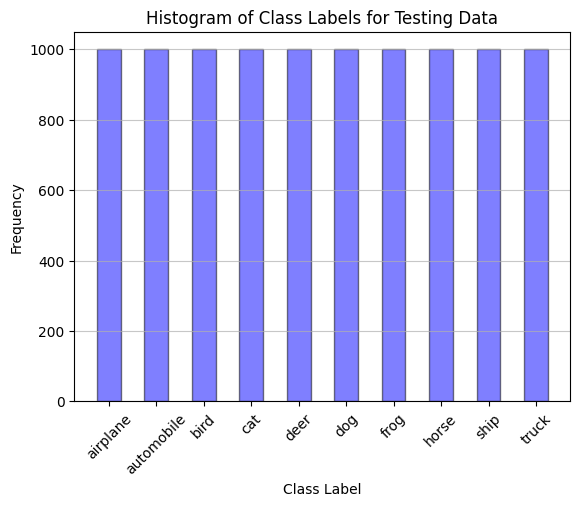

In [7]:
plt.hist(y_test,bins=np.arange(11)-0.5, edgecolor='black',color='blue',rwidth=0.5,alpha=0.5)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Histogram of Class Labels for Testing Data')
plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.show()

From the plot above we see that the number of images for testing data in each category is same i.e. 1000 images. Both the training and test datasets are balanced.

Now let us see how the first 10 images in the dataset look like.

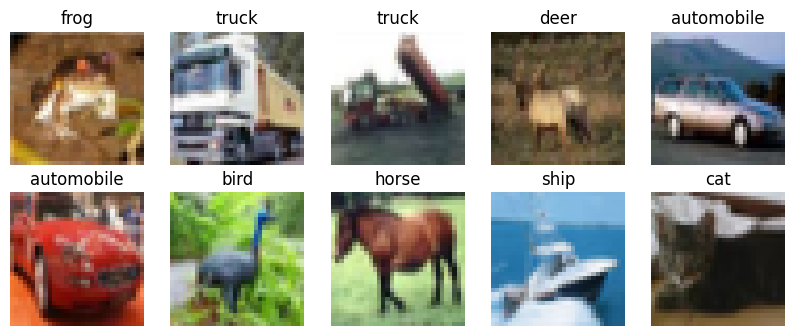

In [8]:
# Plot the images
plt.figure(figsize=(10, 8))
for i, index in enumerate(range(10)):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[index])
    plt.title(class_names[y_train[index][0]])
    plt.axis('off')
plt.show()

We need to normalize pixel values to be between 0 and 1. We would not be one-hot encoding the labels here because we would be using loss='sparse_categorical_crossentropy' to handle integer labels.

In [9]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# CNN Model

Convolutional Neural Network (CNN) is a type of deep neural network commonly used for analyzing images. It's specifically designed to automatically and adaptively learn spatial hierarchies of features from the input data. CNNs learn hierarchical representations of the input data. The initial layers capture low-level features like edges and textures, while deeper layers capture higher-level features and semantic information. By increasing the number of filters in deeper layers, the network can learn more sophisticated features built upon the lower-level ones.

We would be using multiple convolutional layers and max pooling layers, followed by a flatten layer to convert the 2D feature maps into a 1D vector, and one fully connected dense layer. Finally, we have output layer with softmax activation for multi-class classification. We use relu activation function with padding='same'. We increase the number of filters in deeper layers to allow the network to learn more complex and abstract features from the input data.

In [5]:
input_shape=(32,32,3)
model1 = models.Sequential()
model1.add(layers.Conv2D(32,(3,3),activation='relu', padding='same', input_shape=input_shape))
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Conv2D(32,(3,3),activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(3,3),activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(512, (3,3), activation='relu', padding='same'))
model1.add(layers.Flatten())
model1.add(layers.Dense(1024))
model1.add(layers.Dense(10, activation="softmax", name='output'))

In [55]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_77 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 4, 4, 64)         

Now let us visualize the model.

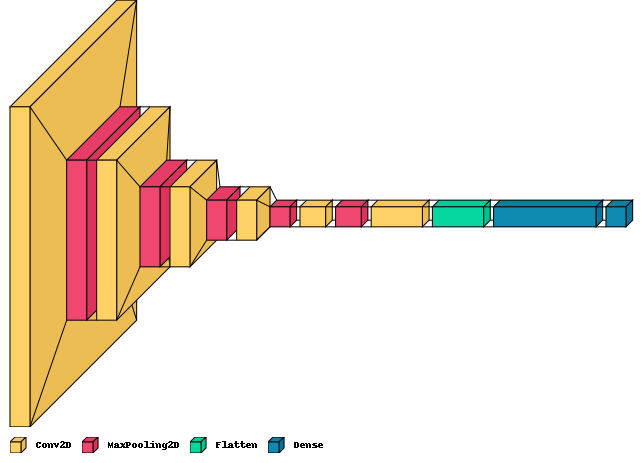

In [13]:
network = model1
visualkeras.layered_view(network, scale_xy=10, legend=True)

In [14]:
# Define the learning rate
learning_rate = 0.001  # Example learning rate value

# Initialize the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
# Use sparse categorical crossentropy for integer labels
model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
history = model1.fit(X_train, y_train, epochs = 10, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/10
391/391 [==============================] - 21s 15ms/step - loss: 1.6719 - accuracy: 0.3566 - val_loss: 1.3748 - val_accuracy: 0.4996
Epoch 2/10
391/391 [==============================] - 3s 9ms/step - loss: 1.2042 - accuracy: 0.5588 - val_loss: 1.1498 - val_accuracy: 0.5913
Epoch 3/10
391/391 [==============================] - 3s 9ms/step - loss: 1.0109 - accuracy: 0.6377 - val_loss: 1.0029 - val_accuracy: 0.6486
Epoch 4/10
391/391 [==============================] - 4s 9ms/step - loss: 0.8688 - accuracy: 0.6938 - val_loss: 0.9738 - val_accuracy: 0.6582
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 0.7666 - accuracy: 0.7286 - val_loss: 0.9146 - val_accuracy: 0.6945
Epoch 6/10
391/391 [==============================] - 4s 9ms/step - loss: 0.6848 - accuracy: 0.7603 - val_loss: 0.8844 - val_accuracy: 0.6961
Epoch 7/10
391/391 [==============================] - 3s 9ms/step - loss: 0.6108 - accuracy: 0.7861 - val_loss: 0.8429 - val_accuracy: 0.7202
Epo

In [16]:
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.9220 - accuracy: 0.7263 - 937ms/epoch - 3ms/step

Test accuracy: 0.7263000011444092


313/313 - 1s - loss: 0.9220 - accuracy: 0.7263 - 767ms/epoch - 2ms/step


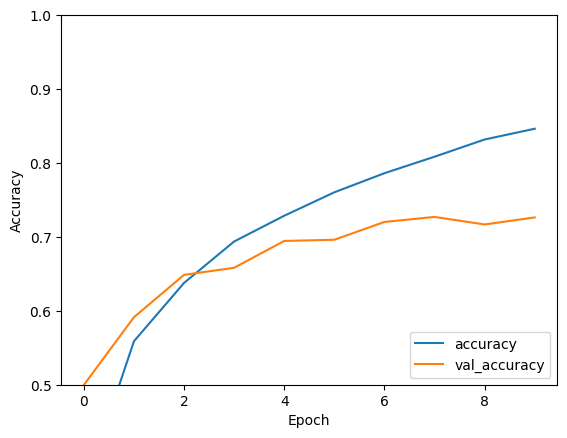

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model1.evaluate(X_test,  y_test, verbose=2)

From the plot we see that both the training and validation accuracy are increasing. Let us print the predictions.

In [19]:
print(np.argmax(predictions, axis = 1))

[3 8 8 0 6 6 5 6 3 1]


Now let us predict probabilities for the first 10 images in X_test and plot them.

In [18]:
# Predict probabilities for the first 10 images in X_test
predictions = model1.predict(X_test[:10])

1/1 [==============================] - 1s 516ms/step


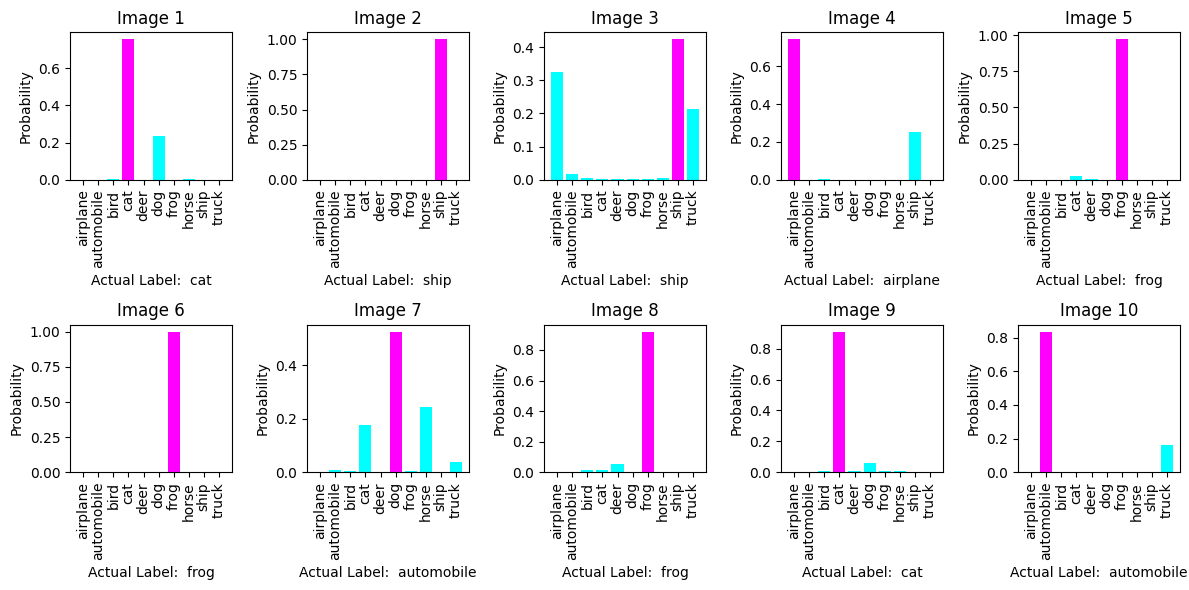

In [20]:
# Plot the predicted probabilities for each image
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.bar(range(10), predictions[i], color=['magenta' if j == np.argmax(predictions[i]) else 'cyan' for j in range(10)])
    plt.title(f"Image {i+1}")
    plt.xlabel(f"Actual Label:  {class_names[y_test[i][0]]}")
    plt.ylabel("Probability")
    plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], rotation=90)
    plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 18ms/step


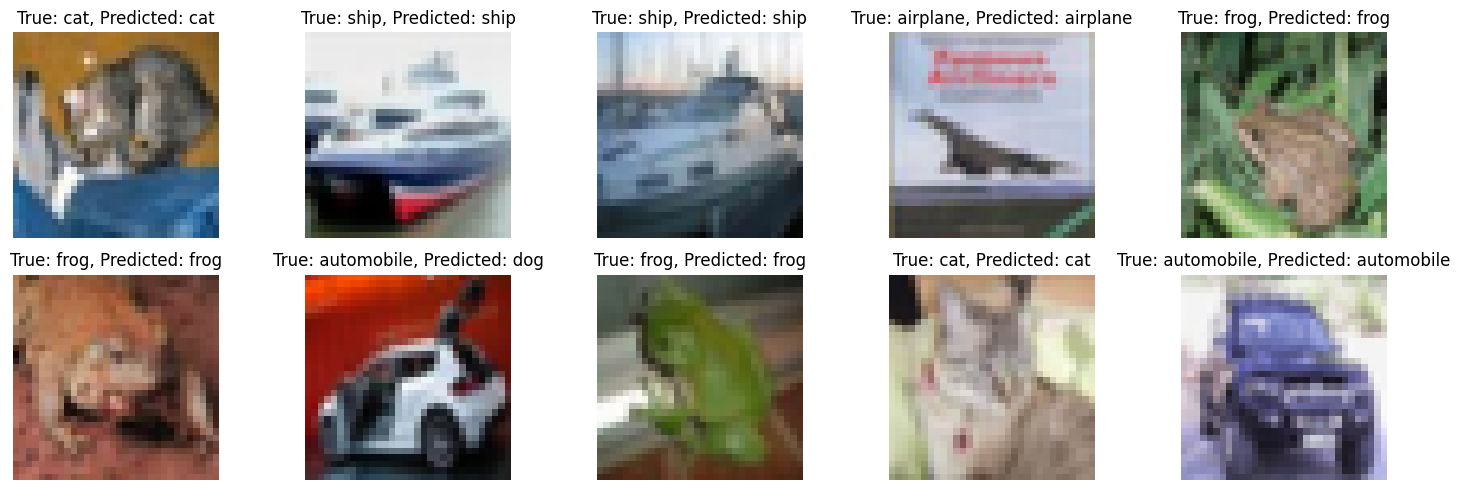

In [21]:
# View the first ten predicted images, to check the validity of the labels
batch_size=10
images = X_test[:batch_size]
labels = y_test[:batch_size]

# Predict labels for the images
predictions = model1.predict(images)
predicted_labels = tf.argmax(predictions, axis=1)

# Display the images along with their predicted labels
plt.figure(figsize=(15, 5))
for i in range(batch_size):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    true_label = class_names[labels[i][0]]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

We see that the predicted labels are matching the true labels for all the first 10 images in X_test except Image 7 where the True label is 'automobile' but the model has predicted as 'dog'. The test accuracy is 72.63%.

**Hyperparameter Tuning:** Now let us try to change the learning rate to  0.0001 and decrease the batch size from 128 to 64. We will increase the number of epochs and use early stopping to find the best validation accuracy.

In [27]:
# Define the learning rate
learning_rate = 0.0001  # Example learning rate value

# Initialize the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
# Use sparse categorical crossentropy for integer labels
model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
# Train the model
history = model1.fit(X_train, y_train, epochs = 50, batch_size=64, validation_data=(X_test,y_test), callbacks=[early_stopping])

Epoch 1/50
782/782 [==============================] - 11s 9ms/step - loss: 1.8157 - accuracy: 0.3133 - val_loss: 1.6113 - val_accuracy: 0.4039
Epoch 2/50
782/782 [==============================] - 6s 7ms/step - loss: 1.4848 - accuracy: 0.4497 - val_loss: 1.4351 - val_accuracy: 0.4643
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 1.3505 - accuracy: 0.5022 - val_loss: 1.2952 - val_accuracy: 0.5277
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 1.2562 - accuracy: 0.5411 - val_loss: 1.2049 - val_accuracy: 0.5625
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 1.1855 - accuracy: 0.5672 - val_loss: 1.1526 - val_accuracy: 0.5871
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 1.1231 - accuracy: 0.5927 - val_loss: 1.1572 - val_accuracy: 0.5818
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 1.0671 - accuracy: 0.6123 - val_loss: 1.1077 - val_accuracy: 0.6070
Epoch

In [29]:
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.0020 - accuracy: 0.7038 - 1s/epoch - 3ms/step

Test accuracy: 0.7038000226020813


313/313 - 1s - loss: 1.0020 - accuracy: 0.7038 - 763ms/epoch - 2ms/step


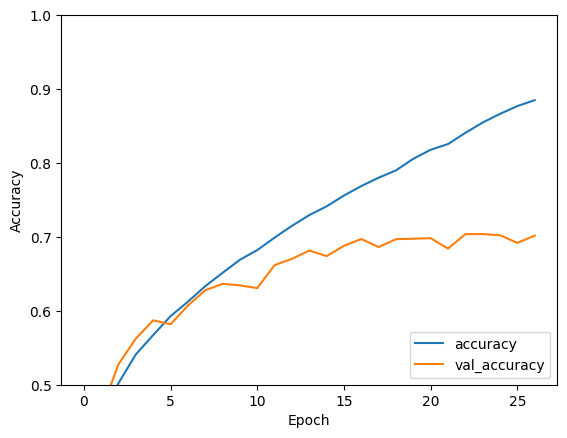

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model1.evaluate(X_test,  y_test, verbose=2)

The test accuracy now is 70.38%.

Now let us try to use SGD instead of Adam optimizer. We will change the learning rate to 0.005 and set number of epochs to 50 with early stopping and batch size as 64.

In [14]:
from tensorflow.keras.optimizers import SGD
# Define the learning rate
learning_rate = 0.005  # Example learning rate value

# Initialize the optimizer with the specified learning rate
optimizer = SGD(learning_rate=learning_rate)

# Compile the model with the optimizer
# Use sparse categorical crossentropy for integer labels
model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
# Train the model
history = model1.fit(X_train, y_train, epochs = 50, batch_size=64, validation_data=(X_test,y_test), callbacks=[early_stopping])

Epoch 1/50
782/782 [==============================] - 8s 8ms/step - loss: 0.4420 - accuracy: 0.8490 - val_loss: 0.8909 - val_accuracy: 0.7084
Epoch 2/50
782/782 [==============================] - 6s 7ms/step - loss: 0.3908 - accuracy: 0.8662 - val_loss: 0.9059 - val_accuracy: 0.7089
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 0.3613 - accuracy: 0.8775 - val_loss: 0.9196 - val_accuracy: 0.7114
Epoch 4/50
782/782 [==============================] - 5s 7ms/step - loss: 0.3355 - accuracy: 0.8869 - val_loss: 0.9446 - val_accuracy: 0.7091
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 0.3115 - accuracy: 0.8955 - val_loss: 0.9693 - val_accuracy: 0.7114
Epoch 6/50
782/782 [==============================] - 5s 7ms/step - loss: 0.2886 - accuracy: 0.9046 - val_loss: 0.9868 - val_accuracy: 0.7124
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 0.2663 - accuracy: 0.9131 - val_loss: 1.0370 - val_accuracy: 0.7066
Epoch 

In [16]:
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.9868 - accuracy: 0.7124 - 842ms/epoch - 3ms/step

Test accuracy: 0.7124000191688538


313/313 - 1s - loss: 0.9868 - accuracy: 0.7124 - 815ms/epoch - 3ms/step


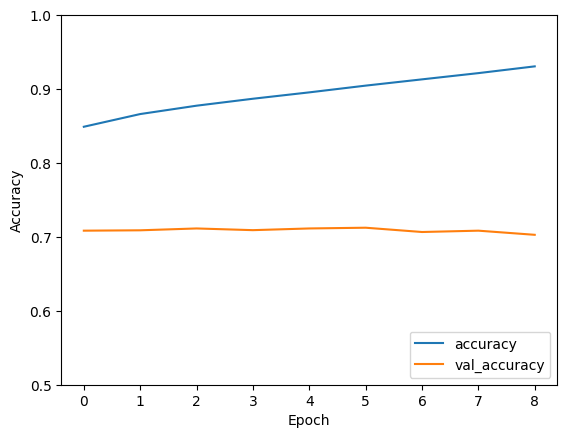

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model1.evaluate(X_test,  y_test, verbose=2)

Now the test accuracy is 71.24%, which is greater compared to 70.38% when we were using Adam optimizer with similar hyperparameters.

#Resnet Model

Now we will try to build Resnet Model with 50 layers (ResNet-50).
Residual Networks, introduced by Microsoft Research, utilize residual connections to address the vanishing gradient problem in deep networks. These connections allow for training very deep networks (up to hundreds of layers) effectively. The Residual Blocks consist of convolutional layers with BatchNormalization and ReLU activation, followed by an identity block with skip connections. These blocks are repeated multiple times, with varying numbers of filters (64, 128, 256, and 512) and repetitions (3, 4, 6, and 3). We use MaxPooling layers with a pool size of (3, 3) and strides of (2, 2) after certain blocks to downsample the feature maps.
We apply Global Average Pooling to the output of the last residual block to reduce the spatial dimensions to 1x1 and generate a fixed-size feature vector.
We use softmax activation in the Dense output layer to predict the class probabilities.

In [11]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def conv_block(input_tensor, filters, kernel_size, strides=(1, 1), padding='same'):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def identity_block(input_tensor, filters, kernel_size):
    # Get the number of channels in the input tensor
    input_channels = input_tensor.shape[-1]

    # Call the conv_block function to create the main path
    x = conv_block(input_tensor, filters, kernel_size)

    # Adjust the number of channels using a 1x1 convolution
    if input_channels != filters:
        shortcut = Conv2D(filters, (1, 1), padding='same')(input_tensor)
    else:
        shortcut = input_tensor

    # Add the shortcut connection
    x = Add()([x, shortcut])

    # Apply batch normalization and activation
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    return x


def resnet(input_shape=(32, 32, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    # Initial Convolutional Layer
    x = conv_block(inputs, 64, (7, 7), strides=(2, 2))

    # Residual Blocks
    for _ in range(3):
        x = identity_block(x, 64, (3, 3))

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    for _ in range(4):
        x = identity_block(x, 128, (3, 3))

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    for _ in range(6):
        x = identity_block(x, 256, (3, 3))

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    for _ in range(3):
        x = identity_block(x, 512, (3, 3))

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs, name='resnet')
    return model

# Instantiate the model
model3 = resnet()

# Print model summary
model3.summary()


Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 16, 16, 64)           9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_33 (Ba  (None, 16, 16, 64)           256       ['conv2d_20[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_33 (Activation)  (None, 16, 16, 64)           0         ['batch_normalization_33[

Let us visualize the model that we built.

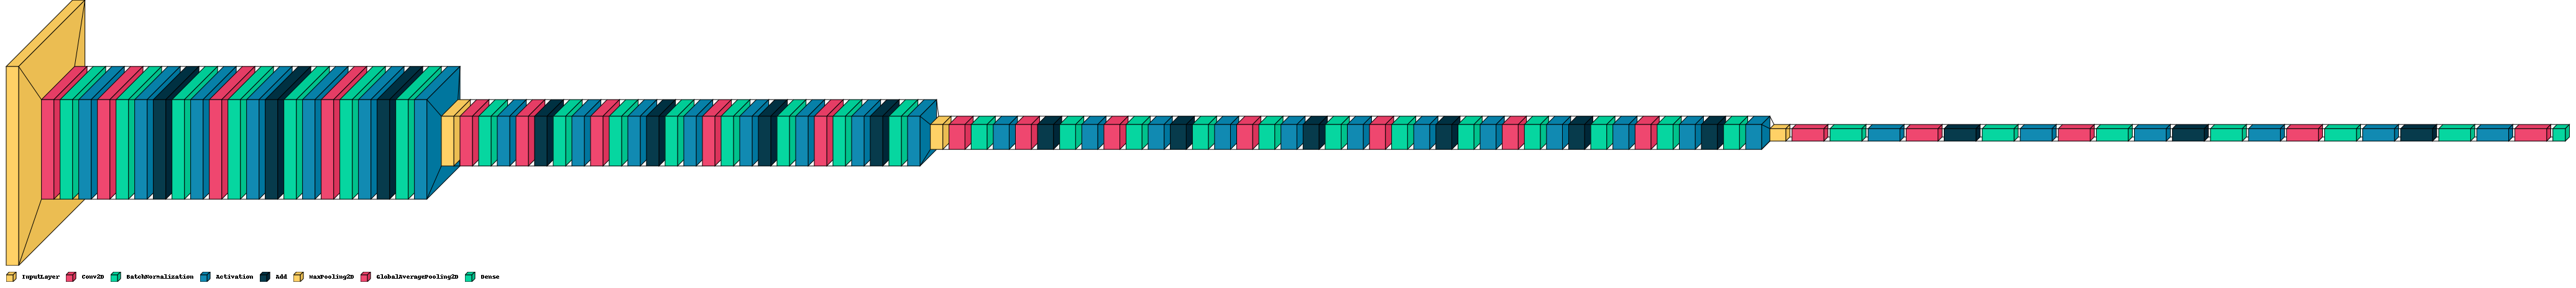

In [32]:
network = model3
visualkeras.layered_view(network, scale_xy=10, legend=True)

In [33]:
# Define the learning rate
learning_rate = 0.001  # Example learning rate value

# Initialize the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
# Use sparse categorical crossentropy for integer labels
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Train the model
history = model3.fit(X_train, y_train, epochs = 10, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/10
391/391 [==============================] - 39s 55ms/step - loss: 1.5042 - accuracy: 0.4592 - val_loss: 1.5189 - val_accuracy: 0.4671
Epoch 2/10
391/391 [==============================] - 18s 46ms/step - loss: 0.9685 - accuracy: 0.6591 - val_loss: 1.1903 - val_accuracy: 0.5837
Epoch 3/10
391/391 [==============================] - 18s 47ms/step - loss: 0.7333 - accuracy: 0.7439 - val_loss: 1.1409 - val_accuracy: 0.6230
Epoch 4/10
391/391 [==============================] - 18s 45ms/step - loss: 0.5775 - accuracy: 0.7998 - val_loss: 0.8796 - val_accuracy: 0.7039
Epoch 5/10
391/391 [==============================] - 18s 45ms/step - loss: 0.4653 - accuracy: 0.8402 - val_loss: 0.8840 - val_accuracy: 0.7012
Epoch 6/10
391/391 [==============================] - 18s 45ms/step - loss: 0.3635 - accuracy: 0.8741 - val_loss: 0.8675 - val_accuracy: 0.7240
Epoch 7/10
391/391 [==============================] - 18s 47ms/step - loss: 0.2849 - accuracy: 0.9005 - val_loss: 0.8447 - val_accuracy:

In [35]:
test_loss, test_acc = model3.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 1.1535 - accuracy: 0.7194 - 2s/epoch - 8ms/step

Test accuracy: 0.7193999886512756


We see the training accuracy is approximately 71.94%.

313/313 - 2s - loss: 1.1535 - accuracy: 0.7194 - 2s/epoch - 7ms/step


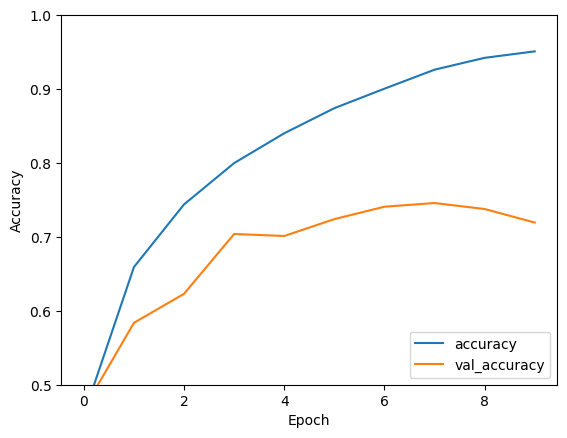

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model3.evaluate(X_test,  y_test, verbose=2)

From the plot above we see that the validation accuracy increases with training accuracy but then starts decreasing.

Let us predict probabilities for the first 10 images in X_test and plot them.

In [37]:
# Predict probabilities for the first 10 images in X_test
predictions = model3.predict(X_test[:10])

1/1 [==============================] - 1s 939ms/step


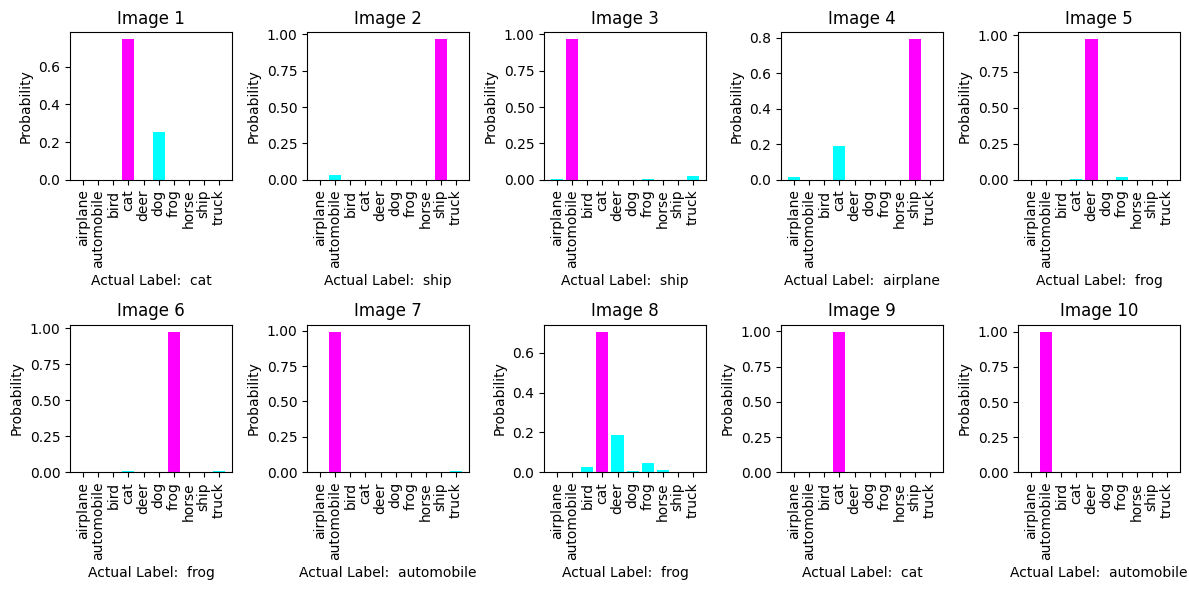

In [38]:
# Plot the predicted probabilities for each image
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.bar(range(10), predictions[i], color=['magenta' if j == np.argmax(predictions[i]) else 'cyan' for j in range(10)])
    plt.title(f"Image {i+1}")
    plt.xlabel(f"Actual Label:  {class_names[y_test[i][0]]}")
    plt.ylabel("Probability")
    plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], rotation=90)
    plt.tight_layout()
plt.show()

Now let us view the first ten predicted images.

1/1 [==============================] - 0s 20ms/step


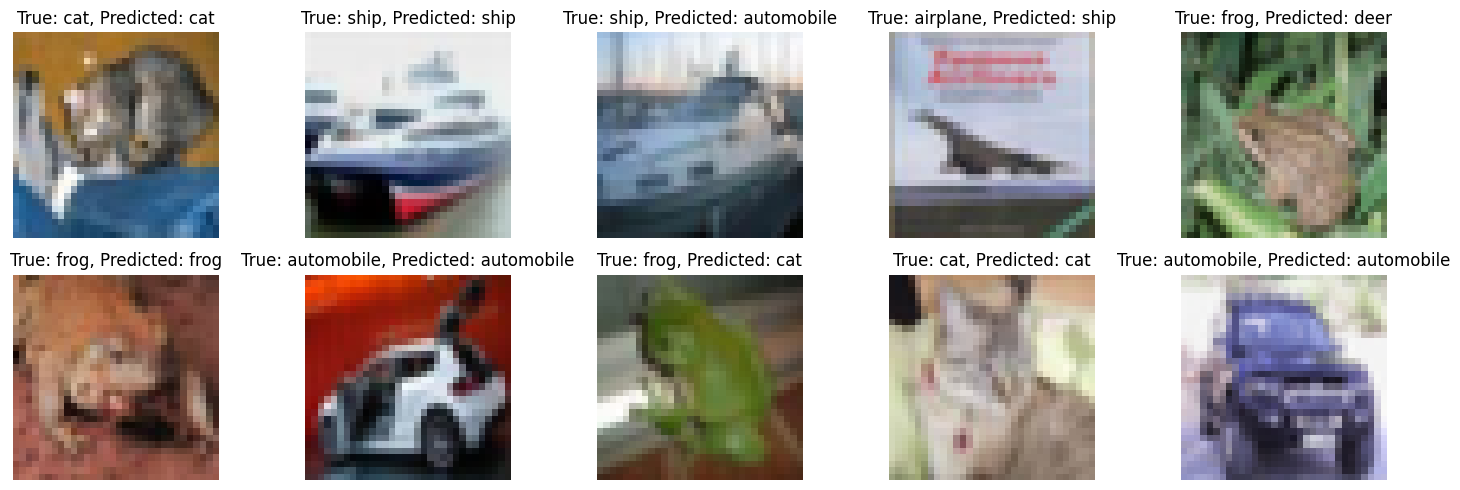

In [39]:
# View the first ten predicted images, to check the validity of the labels
batch_size=10
images = X_test[:batch_size]
labels = y_test[:batch_size]

# Predict labels for the images
predictions = model3.predict(images)
predicted_labels = tf.argmax(predictions, axis=1)

# Display the images along with their predicted labels
plt.figure(figsize=(15, 5))
for i in range(batch_size):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    true_label = class_names[labels[i][0]]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

We see that some images are predicted correctly but some are not.

**Hyperparameter tuning:** Let us change the learning rate to 0.01 and number of epochs to 20 with batch size as 64 and early stopping.

In [85]:
# Define the learning rate
learning_rate = 0.01  # Example learning rate value

# Initialize the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
# Use sparse categorical crossentropy for integer labels
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [86]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
# Train the model
history = model3.fit(X_train, y_train, epochs = 20, batch_size=64, validation_data=(X_test,y_test), callbacks=[early_stopping])

Epoch 1/20
782/782 [==============================] - 45s 35ms/step - loss: 1.4307 - accuracy: 0.5278 - val_loss: 1.0397 - val_accuracy: 0.6463
Epoch 2/20
782/782 [==============================] - 26s 34ms/step - loss: 0.8290 - accuracy: 0.7100 - val_loss: 1.1206 - val_accuracy: 0.6455
Epoch 3/20
782/782 [==============================] - 26s 33ms/step - loss: 0.6756 - accuracy: 0.7655 - val_loss: 1.3696 - val_accuracy: 0.6108
Epoch 4/20
782/782 [==============================] - 26s 33ms/step - loss: 0.5709 - accuracy: 0.8027 - val_loss: 0.8384 - val_accuracy: 0.7279
Epoch 5/20
782/782 [==============================] - 27s 35ms/step - loss: 0.4956 - accuracy: 0.8277 - val_loss: 0.8353 - val_accuracy: 0.7422
Epoch 6/20
782/782 [==============================] - 27s 35ms/step - loss: 0.4288 - accuracy: 0.8509 - val_loss: 0.9527 - val_accuracy: 0.6944
Epoch 7/20
782/782 [==============================] - 26s 33ms/step - loss: 0.3692 - accuracy: 0.8695 - val_loss: 0.8760 - val_accuracy:

313/313 - 2s - loss: 0.9993 - accuracy: 0.7953 - 2s/epoch - 7ms/step


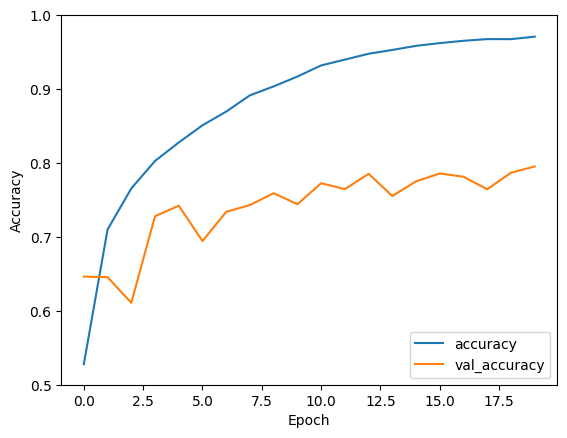

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model3.evaluate(X_test,  y_test, verbose=2)

Now we see that the Test accuracy has increased to 79.53%.

Let us now change the learning rate to 0.0001 and increase the number of epochs to 50 with early stopping.

In [20]:
# Define the learning rate
learning_rate = 0.0001  # Example learning rate value

# Initialize the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
# Use sparse categorical crossentropy for integer labels
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
# Train the model
history = model3.fit(X_train, y_train, epochs = 50, batch_size=64, validation_data=(X_test,y_test), callbacks=[early_stopping])

Epoch 1/50
782/782 [==============================] - 42s 35ms/step - loss: 0.5197 - accuracy: 0.8230 - val_loss: 161.9622 - val_accuracy: 0.7504
Epoch 2/50
782/782 [==============================] - 28s 35ms/step - loss: 0.4914 - accuracy: 0.8333 - val_loss: 453.4290 - val_accuracy: 0.7545
Epoch 3/50
782/782 [==============================] - 26s 33ms/step - loss: 0.4761 - accuracy: 0.8387 - val_loss: 412.8206 - val_accuracy: 0.7584
Epoch 4/50
782/782 [==============================] - 26s 33ms/step - loss: 0.4695 - accuracy: 0.8401 - val_loss: 476.5386 - val_accuracy: 0.7600
Epoch 5/50
782/782 [==============================] - 26s 34ms/step - loss: 0.4607 - accuracy: 0.8443 - val_loss: 446.9590 - val_accuracy: 0.7623
Epoch 6/50
782/782 [==============================] - 27s 35ms/step - loss: 0.4526 - accuracy: 0.8474 - val_loss: 458.1579 - val_accuracy: 0.7619
Epoch 7/50
782/782 [==============================] - 26s 33ms/step - loss: 0.4474 - accuracy: 0.8482 - val_loss: 409.7321 -

In [24]:
test_loss, test_acc = model3.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 261.0821 - accuracy: 0.7709 - 3s/epoch - 10ms/step

Test accuracy: 0.7709000110626221


313/313 - 3s - loss: 261.0821 - accuracy: 0.7709 - 3s/epoch - 9ms/step


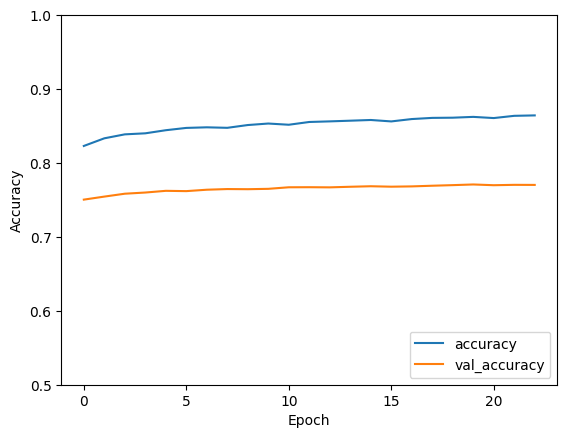

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model3.evaluate(X_test,  y_test, verbose=2)

1/1 [==============================] - 1s 1s/step


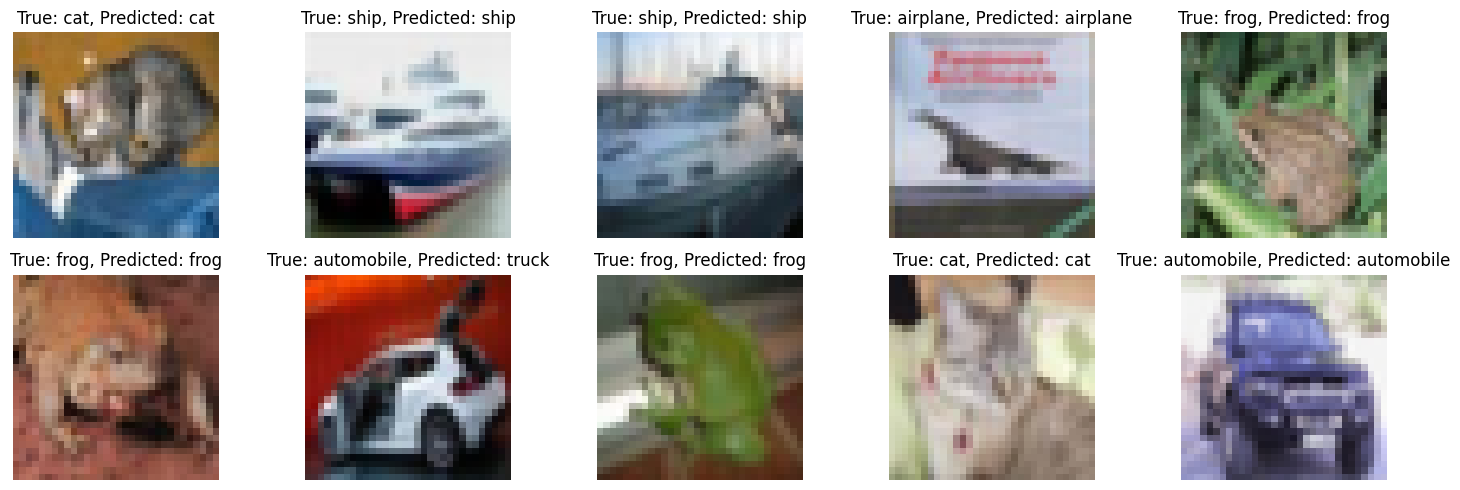

In [23]:
# View the first ten predicted images, to check the validity of the labels
batch_size=10
images = X_test[:batch_size]
labels = y_test[:batch_size]

# Predict labels for the images
predictions = model3.predict(images)
predicted_labels = tf.argmax(predictions, axis=1)

# Display the images along with their predicted labels
plt.figure(figsize=(15, 5))
for i in range(batch_size):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    true_label = class_names[labels[i][0]]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

We see that the test accuracy is now 77.09%. We see that for the first 10 predicted images the true label matches with the predicted label except for Image 7 where 'automobile' is predicted as 'truck'.

# DenseNet Model
Now we will build a DenseNet Model for image classification. In a DenseNet Model there is dense connectivity between layers, where each layer receives direct input from all preceding layers.
Dense Convolutional Networks were proposed by researchers at Facebook AI Research. The dense connectivity pattern enhances feature propagation and encourages feature reuse, resulting in compact models with strong performance. We wil use dense blocks to concatenate feature maps from earlier layers with the feature maps of subsequent layers. We will use transition blocks between dense blocks to control the number of feature maps and to downsample the spatial dimensions of feature maps.

In [47]:
def dense_block(x, growth_rate, num_layers):
    for _ in range(num_layers):
        x1 = layers.BatchNormalization()(x)
        x1 = layers.Activation('relu')(x1)
        x1 = layers.Conv2D(growth_rate, 3, padding='same')(x1)
        x = layers.Concatenate()([x, x1])
    return x

def transition_block(x, compression_factor):
    num_channels = int(x.shape[-1] * compression_factor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(num_channels, 1, padding='same')(x)
    x = layers.AveragePooling2D(2)(x)
    return x

def densenet(input_shape, num_classes, num_dense_blocks=3, growth_rate=12, num_layers_per_block=4, compression_factor=0.5):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(2*growth_rate, 3, padding='same')(inputs)
    for _ in range(num_dense_blocks):
        x = dense_block(x, growth_rate, num_layers_per_block)
        x = transition_block(x, compression_factor)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs, name='densenet')
    return model

# Define model parameters
input_shape = (32, 32, 3)
num_classes = 10

# Create DenseNet model
model4 = densenet(input_shape, num_classes)

# Print model summary
model4.summary()

Model: "densenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_58 (Conv2D)          (None, 32, 32, 24)           672       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_33 (Ba  (None, 32, 32, 24)           96        ['conv2d_58[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_33 (Activation)  (None, 32, 32, 24)           0         ['batch_normalization_3

Let us visualize our DenseNet model.

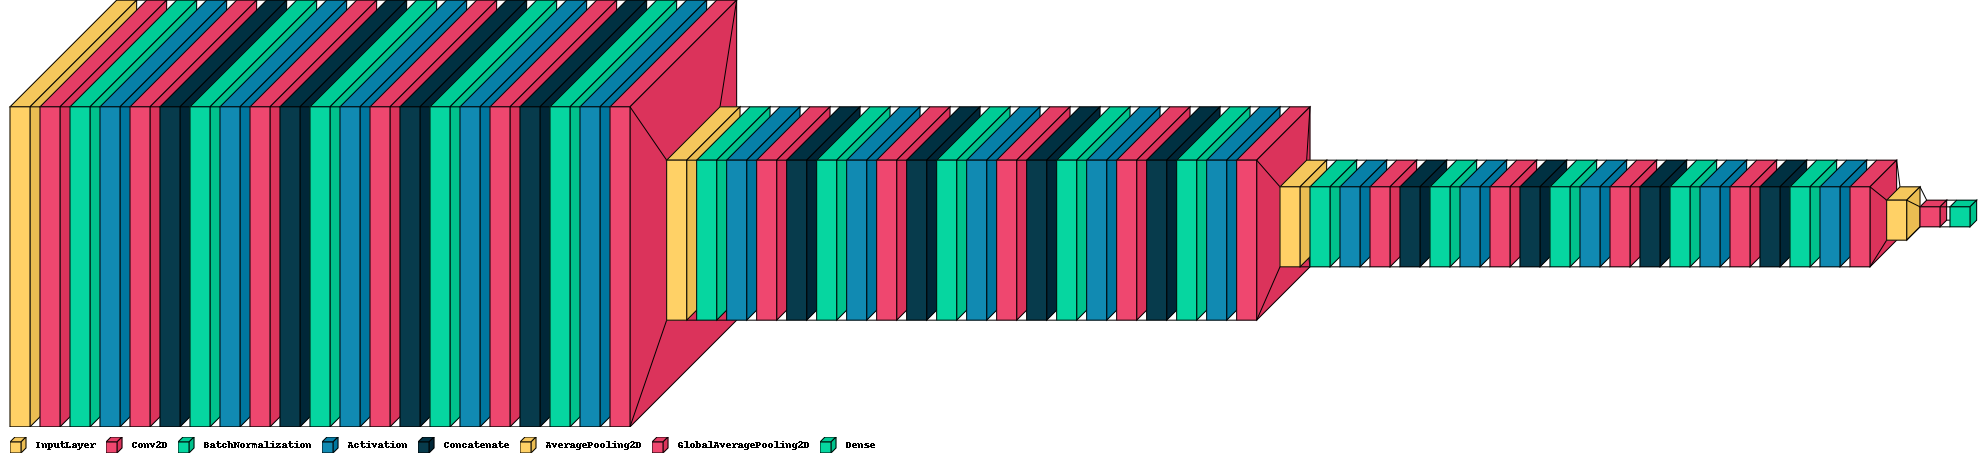

In [62]:
network = model4
visualkeras.layered_view(network, scale_xy=10, legend=True)

In [48]:
# Define the learning rate
learning_rate = 0.001  # Example learning rate value

# Initialize the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
# Use sparse categorical crossentropy for integer labels
model4.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Train the model
history = model4.fit(X_train, y_train, epochs = 10, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/10
391/391 [==============================] - 32s 50ms/step - loss: 1.4265 - accuracy: 0.4790 - val_loss: 2.2245 - val_accuracy: 0.2647
Epoch 2/10
391/391 [==============================] - 17s 43ms/step - loss: 1.0234 - accuracy: 0.6327 - val_loss: 1.2086 - val_accuracy: 0.5645
Epoch 3/10
391/391 [==============================] - 17s 44ms/step - loss: 0.8717 - accuracy: 0.6883 - val_loss: 1.7329 - val_accuracy: 0.4612
Epoch 4/10
391/391 [==============================] - 17s 45ms/step - loss: 0.7865 - accuracy: 0.7206 - val_loss: 1.1867 - val_accuracy: 0.5866
Epoch 5/10
391/391 [==============================] - 17s 43ms/step - loss: 0.7159 - accuracy: 0.7460 - val_loss: 1.0076 - val_accuracy: 0.6682
Epoch 6/10
391/391 [==============================] - 17s 42ms/step - loss: 0.6543 - accuracy: 0.7687 - val_loss: 2.3154 - val_accuracy: 0.4519
Epoch 7/10
391/391 [==============================] - 17s 43ms/step - loss: 0.6089 - accuracy: 0.7860 - val_loss: 1.1560 - val_accuracy:

In [50]:
test_loss, test_acc = model4.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.9097 - accuracy: 0.6887 - 2s/epoch - 8ms/step

Test accuracy: 0.6887000203132629


313/313 - 1s - loss: 0.9097 - accuracy: 0.6887 - 1s/epoch - 4ms/step


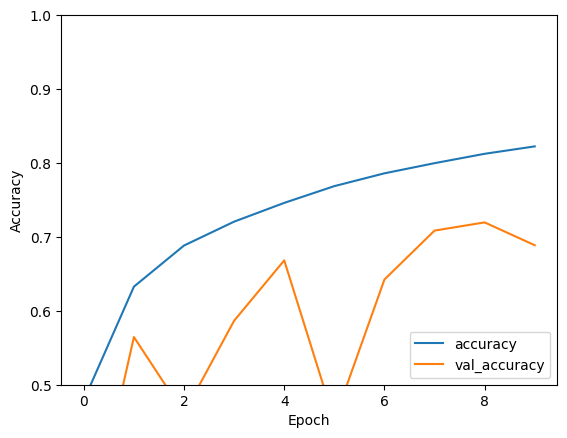

In [51]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model4.evaluate(X_test,  y_test, verbose=2)

We see that the test accuracy is 68.87%. The training accuracy is increasing but the validation accuracy is increasing and decreasing forming different peaks.

Now let us predict probabilities for the first 10 images in X_test and plot these probabilities.

In [52]:
# Predict probabilities for the first 10 images in X_test
predictions = model4.predict(X_test[:10])

1/1 [==============================] - 1s 844ms/step


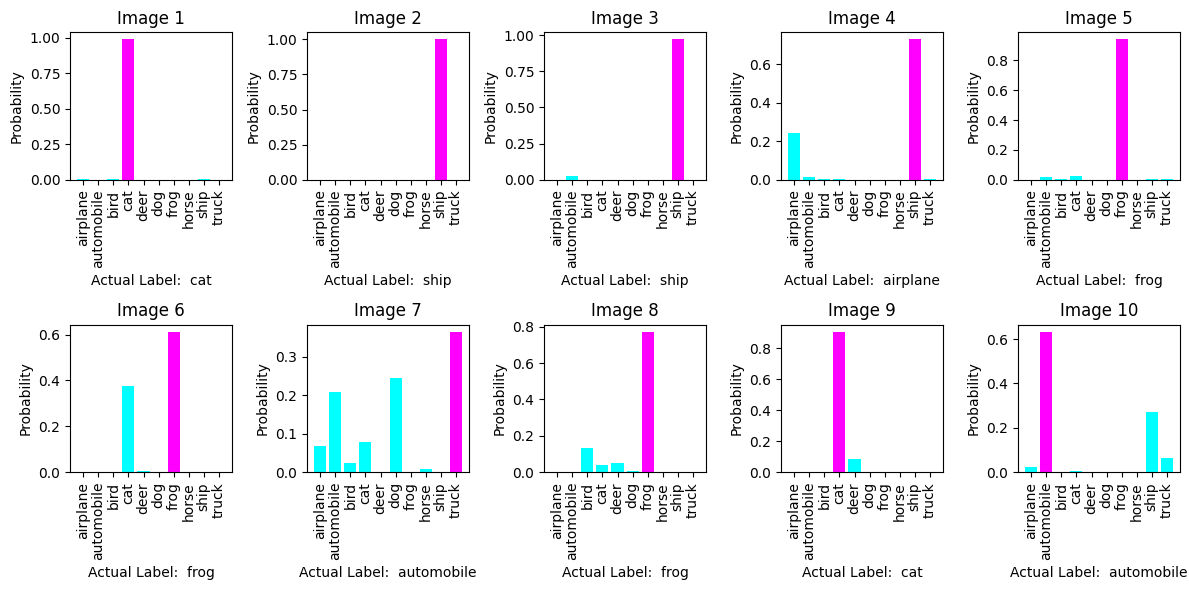

In [53]:
# Plot the predicted probabilities for each image
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.bar(range(10), predictions[i], color=['magenta' if j == np.argmax(predictions[i]) else 'cyan' for j in range(10)])
    plt.title(f"Image {i+1}")
    plt.xlabel(f"Actual Label:  {class_names[y_test[i][0]]}")
    plt.ylabel("Probability")
    plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], rotation=90)
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 20ms/step


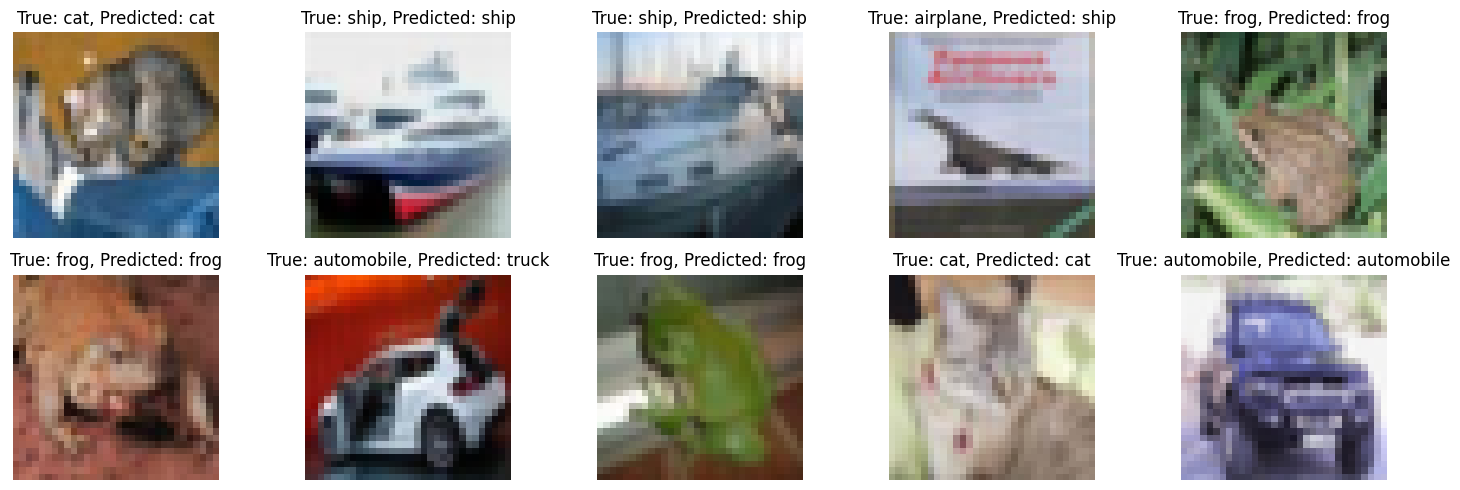

In [54]:
# View the first ten predicted images, to check the validity of the labels
batch_size=10
images = X_test[:batch_size]
labels = y_test[:batch_size]

# Predict labels for the images
predictions = model4.predict(images)
predicted_labels = tf.argmax(predictions, axis=1)

# Display the images along with their predicted labels
plt.figure(figsize=(15, 5))
for i in range(batch_size):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    true_label = class_names[labels[i][0]]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

We see that most of the predicted images labels match with their true label. Two of them do not match where airplane is predicted as ship and automobile is predicted as truck.

**Hyperparameter tuning:** From the accuracy plot we see that the model is overfitting. We will try to reduce the batch size and increase the learning rate.

In [55]:
# Define the learning rate
learning_rate = 0.01  # Example learning rate value

# Initialize the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
# Use sparse categorical crossentropy for integer labels
model4.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
# Train the model
history = model4.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 43s 20ms/step - loss: 1.1679 - accuracy: 0.5887 - val_loss: 1.1018 - val_accuracy: 0.6192
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8044 - accuracy: 0.7190 - val_loss: 1.0688 - val_accuracy: 0.6619
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6874 - accuracy: 0.7629 - val_loss: 0.8582 - val_accuracy: 0.7027
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6160 - accuracy: 0.7876 - val_loss: 0.7149 - val_accuracy: 0.7593
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5637 - accuracy: 0.8052 - val_loss: 0.6965 - val_accuracy: 0.7622
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.5255 - accuracy: 0.8194 - val_loss: 0.6261 - val_accuracy: 0.7900
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.4884 - accuracy: 0.8318 - val_loss: 0.7960 -

313/313 - 3s - loss: 0.6218 - accuracy: 0.7930 - 3s/epoch - 8ms/step


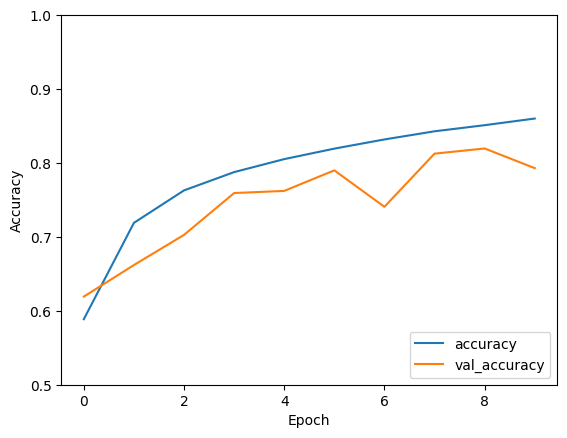

In [57]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model4.evaluate(X_test,  y_test, verbose=2)

The accuracy has now increased to 79.30%.

Now let us increase the number of epochs to 20 and do early stopping.

In [64]:
# Define the learning rate
learning_rate = 0.01  # Example learning rate value

# Initialize the optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
# Use sparse categorical crossentropy for integer labels
model4.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)
# Train the model
history = model4.fit(X_train, y_train, epochs = 20, batch_size=32, validation_data=(X_test,y_test), callbacks=[early_stopping])

Epoch 1/20
1563/1563 [==============================] - 41s 20ms/step - loss: 0.4477 - accuracy: 0.8504 - val_loss: 0.5257 - val_accuracy: 0.8265
Epoch 2/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.3970 - accuracy: 0.8648 - val_loss: 0.5294 - val_accuracy: 0.8297
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.3769 - accuracy: 0.8715 - val_loss: 0.5178 - val_accuracy: 0.8336
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.3604 - accuracy: 0.8764 - val_loss: 0.4984 - val_accuracy: 0.8353
Epoch 5/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.3441 - accuracy: 0.8822 - val_loss: 0.5185 - val_accuracy: 0.8351
Epoch 6/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.3340 - accuracy: 0.8860 - val_loss: 0.5108 - val_accuracy: 0.8365
Epoch 7/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.3241 - accuracy: 0.8887 - val_loss: 0.5083 -

In [66]:
test_loss, test_acc = model4.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5154 - accuracy: 0.8419 - 1s/epoch - 4ms/step

Test accuracy: 0.8418999910354614


313/313 - 3s - loss: 0.5154 - accuracy: 0.8419 - 3s/epoch - 10ms/step


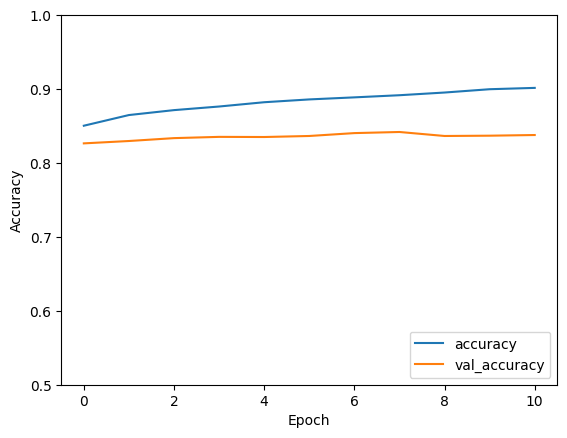

In [67]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model4.evaluate(X_test,  y_test, verbose=2)

The test accuracy has now increased from 79.30% to 84.19%.

Now let us predict probabilities for the first 10 images in X_test and plot these probabilities.

In [68]:
# Predict probabilities for the first 10 images in X_test
predictions = model4.predict(X_test[:10])

1/1 [==============================] - 1s 654ms/step


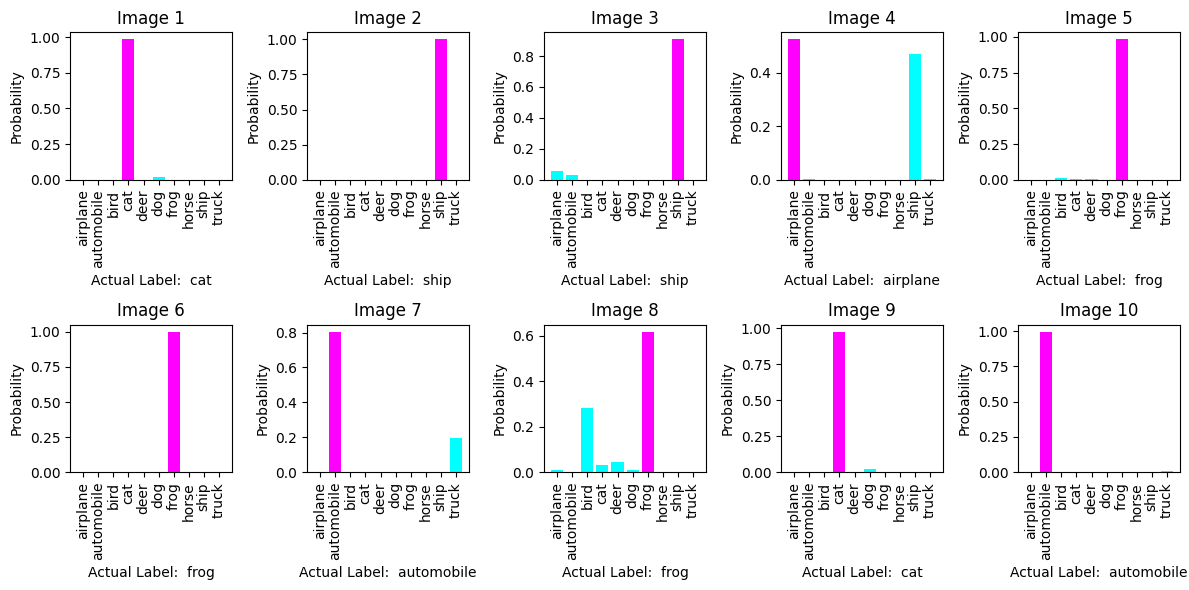

In [69]:
# Plot the predicted probabilities for each image
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.bar(range(10), predictions[i], color=['magenta' if j == np.argmax(predictions[i]) else 'cyan' for j in range(10)])
    plt.title(f"Image {i+1}")
    plt.xlabel(f"Actual Label:  {class_names[y_test[i][0]]}")
    plt.ylabel("Probability")
    plt.xticks(range(10), ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], rotation=90)
    plt.tight_layout()
plt.show()

Now let us view the first ten predicted images to check the validity of the labels.

1/1 [==============================] - 0s 85ms/step


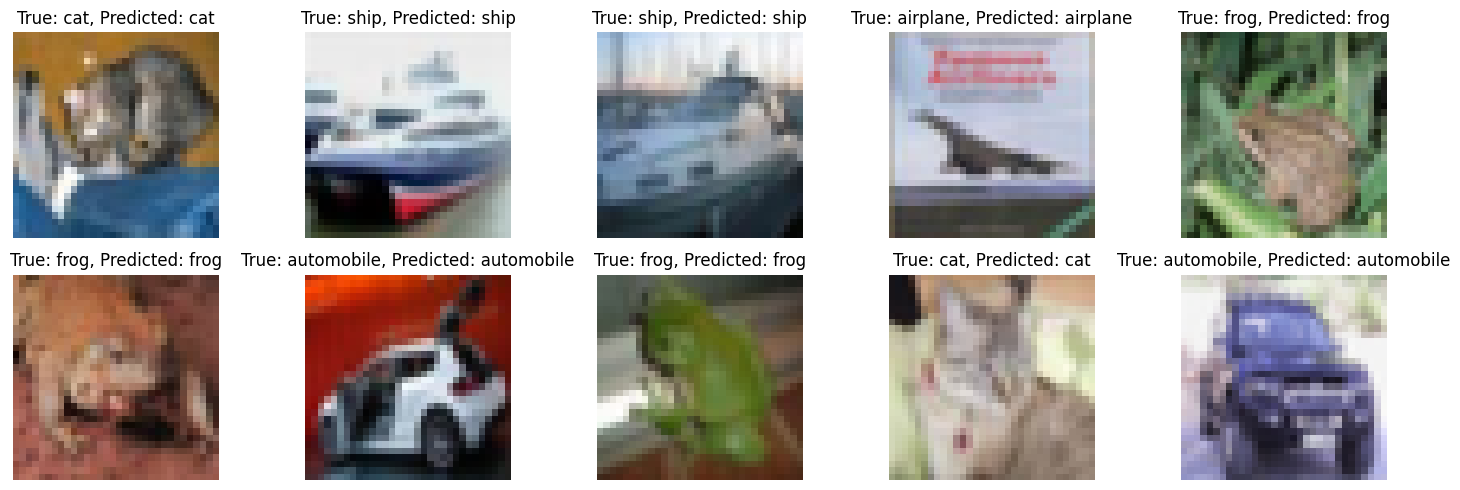

In [70]:
# View the first ten predicted images, to check the validity of the labels
batch_size=10
images = X_test[:batch_size]
labels = y_test[:batch_size]

# Predict labels for the images
predictions = model4.predict(images)
predicted_labels = tf.argmax(predictions, axis=1)

# Display the images along with their predicted labels
plt.figure(figsize=(15, 5))
for i in range(batch_size):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    true_label = class_names[labels[i][0]]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

We see that the first ten predicted images have been classified correctly i.e. the predicted label matches the true label.

#Results

 *   For CNN Model: Initially, the test accuracy is 72.63%. After changing the learning rate to 0.0001 and decreasing the batch size from 128 to 64 test accuracy is 70.38%.
After using SGD instead of Adam optimizer and changing the learning rate to 0.005 and setting number of epochs to 50 with early stopping and batch size as 64 test accuracy is 71.24%.


---


*   For ResNet Model: Initially, the test accuracy is 71.94%. After changing the learning rate to 0.01 and number of epochs to 20 with batch size as 64 and early stopping, the test accuracy is 79.53%.
After changing the learning rate to 0.0001 and increasing the number of epochs to 50 with early stopping the test accuracy is 77.09%.

---


*   DenseNet Model: Initially, the test accuracy is 68.87%. After trying to reduce the batch size and increasing the learning rate the test accuracy is 79.30%. After increasing the number of epochs to 20 and doing early stopping the test accuracy is 84.19%



---




#Conclusion
From the above data we see that all the models did well but there is scope for improvement. The test accuracy is highest for DenseNet Model 84.19% that was trained for 20 epochs with early stopping.
Larger models with more parameters require more memory and computational resources to train and evaluate so we could not train more models. Experimenting with different hyperparameters and training configurations to optimize model performance requires running multiple training experiments, further increasing resource consumption.
In future, we can build more models using different architectures.
Also, we need to increase the accuracy of the models, by training more and tuning other hyperparameters.

**References:**

https://keras.io/api/datasets/cifar10/

http://arxiv.org/pdf/1512.03385v1

https://www.cs.toronto.edu/~kriz/cifar.html